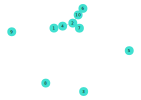

true
false


In [33]:
using Graphs
using GraphPlot

N = 10
p = 0.1

g = erdos_renyi(N, p, is_directed=false)
display(gplot(g, nodelabel=vertices(g)))
println(add_edge!(g, 5, 6))
println(add_edge!(g, 5, 6))

In [16]:
include("Reconstruction.jl")
min_heap, max_heap = get_RA_scores(g)
min_heap

(4, 6) => 27.0

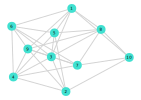

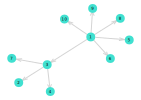

Dict{Int64, Vector{Int64}} with 10 entries:
  5  => []
  4  => [3]
  6  => []
  7  => [3]
  2  => [3]
  10 => []
  9  => []
  8  => []
  3  => []
  1  => []

In [17]:
using GraphPlot

display(gplot(g, nodelabel=vertices(g)))
g = bfs_tree(g, 1)

function path_from_node(par, s, idx)
    vec = Vector{Int}()
    curr = par[idx]
    while (curr != s)
        push!(vec, curr)
        curr = par[curr]
    end
    return vec
end

par = bfs_parents(g, 1)
display(gplot(g, nodelabel=vertices(g)))
dic = Dict(idx => path_from_node(par, 1, idx) for idx in 1:nv(g))

In [18]:
using Revise
includet("Propagation.jl")
includet("Localization.jl")
includet("Reconstruction.jl")
includet("Evaluation.jl")
includet("GraphCreation.jl")

In [19]:
sort!(collect(get_SRW_scores(get_USA_graph())), by=x->x[2])

54946-element Vector{Pair{Tuple{Int64, Int64}, Float64}}:
  (60, 171) => 0.0
   (25, 73) => 0.0
   (9, 285) => 0.0
  (25, 241) => 0.0
  (24, 324) => 0.0
  (28, 300) => 0.0
  (21, 223) => 0.0
  (32, 207) => 0.0
  (14, 147) => 0.0
 (103, 188) => 0.0
            ⋮
 (255, 261) => 13.68307327821454
 (112, 118) => 14.161053734076663
 (118, 255) => 14.366296079268306
  (67, 118) => 14.568433531446155
 (118, 166) => 14.758539217266078
 (118, 261) => 14.817638385771254
 (118, 152) => 17.832650806737142
 (230, 255) => 18.219334655443248
 (118, 182) => 18.46432959809174

In [20]:
include("GraphCreation.jl")
include("Modification.jl")

using GraphPlot
using Graphs
using Plots

g = get_FB_graph()
g, vmap = modify_hide(g, LocData(Dict(), 1, 1), 0.4)
println(nv(g)/800)
# deg = degree(g)
# println(sum(deg)/length(deg))
# println(max(deg...))
# display(Plots.histogram(degree_histogram(g)))
# display(gplot(g))

0.98


In [21]:
using Revise
includet("Evaluation.jl")

In [1]:
include("Evaluation.jl")

N = 1000
graph_type = :fb
beta = 0.95
r = 0.3
loc_type = :pearson
modify_type = :hide
reconstruct_type = :ra
dj = 0.5
k_vec = 0:100:1000

path = "data/rec_$(String(graph_type))_k$(k_vec[begin])_$(k_vec[end])_$(String(loc_type))_$(String(modify_type))_$(String(reconstruct_type)).csv"
evaluate_reconstruct_to_file(graph_type, loc_type, beta, r, N, modify_type, dj, reconstruct_type, k_vec)

Starting 10 iteration
Starting 20 iteration
Starting 30 iteration
Starting 40 iteration
Starting 50 iteration
Starting 60 iteration
Starting 70 iteration
Starting 80 iteration
Starting 90 iteration
Starting 100 iteration
Starting 110 iteration
Starting 120 iteration
Starting 130 iteration
Starting 140 iteration
Starting 150 iteration
Starting 160 iteration
Starting 170 iteration
Starting 180 iteration
Starting 190 iteration
Starting 200 iteration
Starting 210 iteration
Starting 220 iteration
Starting 230 iteration
Starting 240 iteration
Starting 250 iteration
Starting 260 iteration
Starting 270 iteration
Starting 280 iteration
Starting 290 iteration
Starting 300 iteration
Starting 310 iteration
Starting 320 iteration
Starting 330 iteration
Starting 340 iteration
Starting 350 iteration
Starting 360 iteration
Starting 370 iteration
Starting 380 iteration
Starting 390 iteration
Starting 400 iteration
Starting 410 iteration
Starting 420 iteration
Starting 430 iteration
Starting 440 iterati

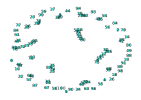

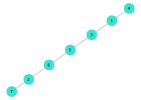

MethodError: MethodError: no method matching calc_jaccard(::SimpleGraph{Int64}, ::SimpleGraph{Int64}, ::LocData)
The function `calc_jaccard` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  calc_jaccard(::SimpleGraph, ::SimpleGraph, !Matched::Vector{Int64})
   @ Main c:\Users\cp\PW\praca_magisterska\PW-source-loc-rec\Modification.jl:65


In [23]:
using Graphs
using GraphPlot
using DataStructures
include("Modification.jl")
include("Reconstruction.jl")

g = erdos_renyi(100, 0.01)
display(gplot(g, nodelabel=vertices(g)))
sg, vmap = modify_hide(g, LocData(Dict(), 1, 1), 0.1)
# new_g = reconstruct_top_k!(sg, PriorityQueue(get_RA_scores(sg)), 2)
display(gplot(sg, nodelabel=vertices(sg)))

# display(gplot(new_g, nodelabel=vertices(new_g)))

println(calc_jaccard(g, sg, vmap))

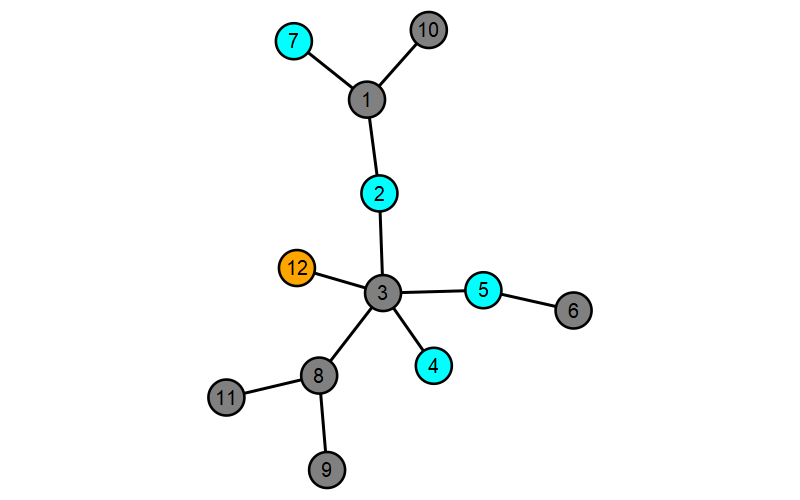

In [184]:
using Karnak
using Graphs
using Colors

using Random
Random.seed!(11011)
include("GraphCreation.jl")
include("Propagation.jl")

g = make_BA_graph(V=12, n0=2, k=1)
loc_data = propagate_SI!(g, 0.3, 0.9)
obs_idxs = Set(keys(loc_data.obs_data))

colors = [x in obs_idxs ? colorant"cyan" : colorant"grey" for x in vertices(g)]
colors[loc_data.source] = colorant"orange"

@png begin
    background("white")
    drawgraph(
        vertexfillcolors=colors,
        vertexshapesizes=18,
        vertexlabels=vertices(g),
        vertexstrokeweights=2.6,
        vertexlabeltextcolors=colorant"black",
        vertexlabelfontsizes=20,
        edgestrokecolors=colorant"black",
        edgestrokeweights=3,
        layout = stress,
        g
        )
end 800 500

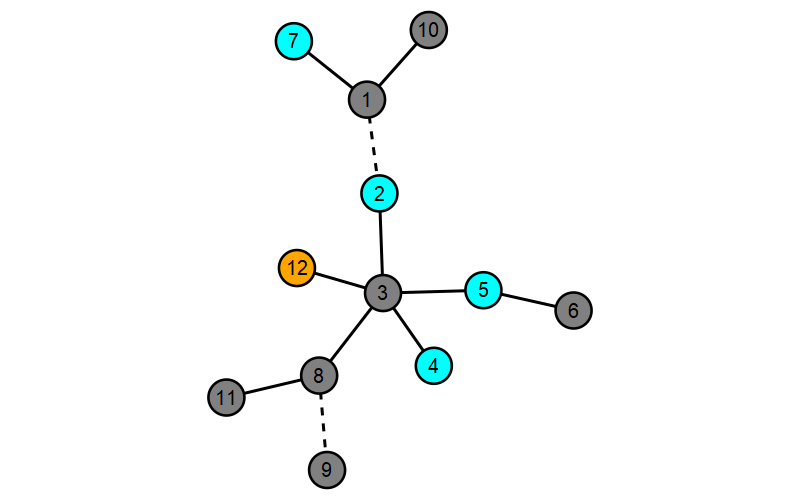

In [185]:
hidden_edges = Set([Edge(7, 1), Edge(1, 2), Edge(8, 9)])
dashes = [edge in hidden_edges ? [8] : [1, 0] for edge in collect(edges(g))]


@png begin
    background("white")
    drawgraph(
        vertexfillcolors=colors,
        vertexshapesizes=18,
        vertexlabels=vertices(g),
        vertexstrokeweights=2.6,
        vertexlabeltextcolors=colorant"black",
        vertexlabelfontsizes=20,
        edgestrokeweights=3,
        edgestrokecolors=colorant"black",
        edgedashpatterns=dashes,
        layout=stress,
        g
    )
end 800 500

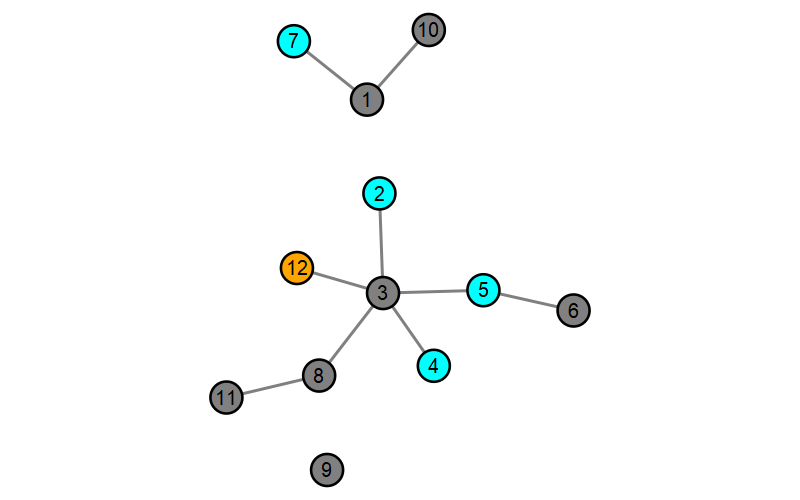

In [186]:
stroke = [edge in hidden_edges ? 0 : 3 for edge in collect(edges(g))]
@png begin
    background("white")
    drawgraph(
        vertexfillcolors=colors,
        vertexshapesizes=16,
        vertexlabels=vertices(g),
        vertexstrokeweights=2.6,
        vertexlabeltextcolors=colorant"black",
        vertexlabelfontsizes=20,
        edgestrokeweights=stroke,
        edgestrokecolors=colorant"grey",
        layout=stress,
        g
    )
end 800 500